In [57]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy

In [58]:
dataset, dataset_info = tfds.load('malaria',
                                  with_info = True,
                                  as_supervised= True,
                                  shuffle_files= True,
                                  split=['train'])

In [59]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE = len(dataset)
  train_dataset = dataset.take(int(TRAIN_RATIO* DATASET_SIZE))

  val_test_dataset = dataset.skip(int(TRAIN_RATIO* DATASET_SIZE))
  val_dataset = val_test_dataset.take(int(VAL_RATIO * DATASET_SIZE))

  test_dataset = val_test_dataset.skip(int(VAL_RATIO * DATASET_SIZE))
  return train_dataset, val_dataset, test_dataset

In [97]:
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1
train_dataset, val_dataset, test_dataset = splits(dataset[0], train_ratio, val_ratio, test_ratio)
print(list(train_dataset.take(1).as_numpy_iterator()),
      list(val_dataset.take(1).as_numpy_iterator()),list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

(-0.5, 114.5, 108.5, -0.5)

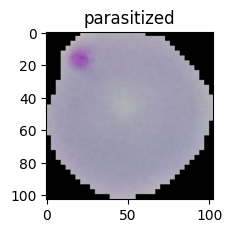

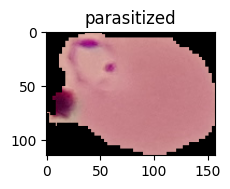

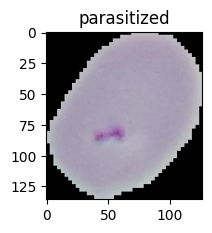

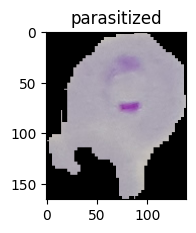

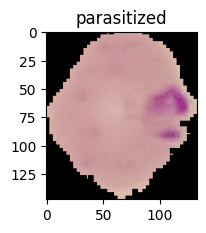

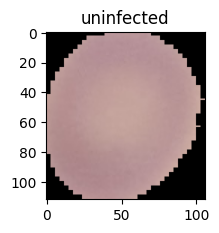

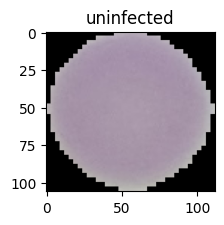

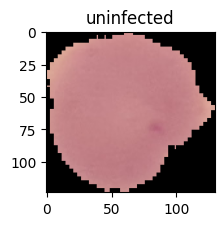

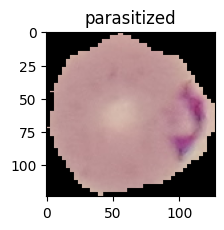

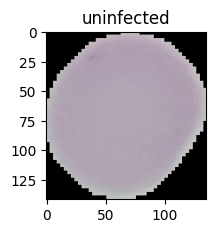

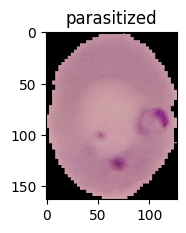

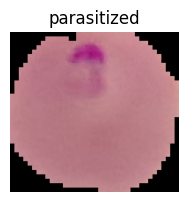

In [61]:
for i, (image, label) in enumerate(train_dataset.take(12)):
  plt.figure(figsize=(10, 10))
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
plt.axis('off')

In [62]:
dataset_info.features['label'].int2str(1)

'uninfected'

In [63]:
size = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (size, size))/255.0, label

train_dataset =  train_dataset.map(resize_rescale)
val_dataset =  val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)
train_dataset

for data in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], shape=(109, 115, 3), dtype=uint8) tf.Tensor(0, shape=(), dtype=int64)


In [96]:
batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_dataset

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>

In [65]:
for data in train_dataset.take(1):
  print(data)

(<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],




In [76]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(size, size, 3)),
    Conv2D(5, 3, activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2,strides = 2),
    Conv2D(12, 3, activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2,strides = 2),
    Flatten(),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid'),

])

In [77]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 5)       140       
                                                                 
 batch_normalization_17 (Ba  (None, 222, 222, 5)       20        
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 111, 111, 5)       0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 12)      552       
                                                                 
 batch_normalization_18 (Ba  (None, 109, 109, 12)      48        
 tchNormalization)                                               
                                                      

In [78]:
y_true = [0,1,0,0]
y_pred = [0.6, 0.51, 0.94, 1]
bce = tf.keras.losses.BinaryCrossentropy()
bce(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=4.9340706>

In [79]:
model.compile(optimizer = Adam(learning_rate=0.01),
                    loss = BinaryCrossentropy(),
                    metrics = 'accuracy')

In [80]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 20, verbose = 1)

Epoch 1/20
689/689 [==============================] - 47s 64ms/step - loss: 0.3361 - accuracy: 0.8590 - val_loss: 0.6336 - val_accuracy: 0.7721
Epoch 2/20
689/689 [==============================] - 42s 60ms/step - loss: 0.2106 - accuracy: 0.9259 - val_loss: 0.1897 - val_accuracy: 0.9543
Epoch 3/20
689/689 [==============================] - 49s 72ms/step - loss: 0.1821 - accuracy: 0.9378 - val_loss: 0.7723 - val_accuracy: 0.8650
Epoch 4/20
689/689 [==============================] - 42s 61ms/step - loss: 0.1788 - accuracy: 0.9387 - val_loss: 0.2245 - val_accuracy: 0.9361
Epoch 5/20
689/689 [==============================] - 42s 61ms/step - loss: 0.1665 - accuracy: 0.9435 - val_loss: 0.1832 - val_accuracy: 0.9390
Epoch 6/20
689/689 [==============================] - 43s 62ms/step - loss: 0.1641 - accuracy: 0.9436 - val_loss: 2.0398 - val_accuracy: 0.7989
Epoch 7/20
689/689 [==============================] - 42s 61ms/step - loss: 0.1592 - accuracy: 0.9432 - val_loss: 0.2816 - val_accuracy:

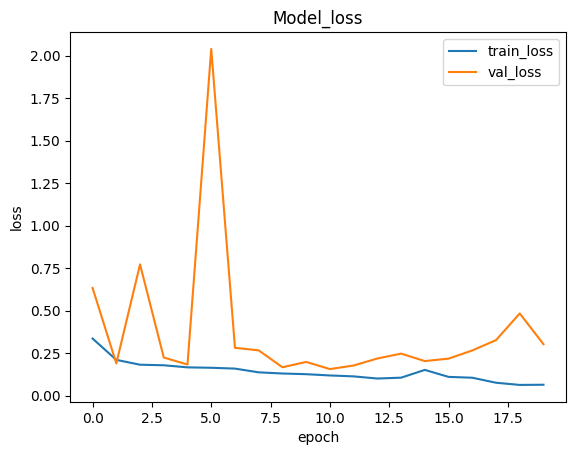

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

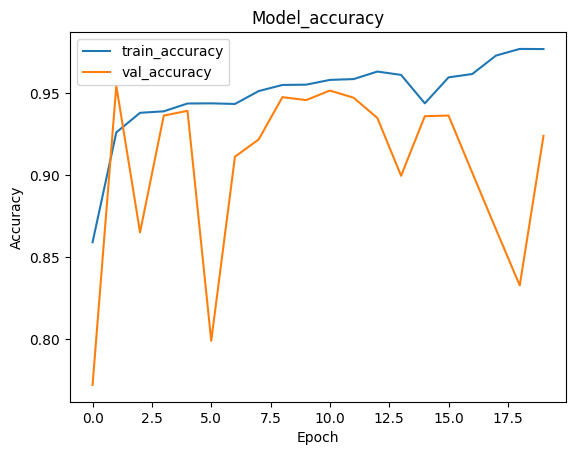

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [85]:
test_dataset = test_dataset.batch(1)

In [86]:
model.evaluate(test_dataset)

2757/2757 [==============================] - 22s 3ms/step - loss: 0.3597 - accuracy: 0.9275


[0.35967764258384705, 0.9274573922157288]

In [88]:
def paraside_or_not(x):
  if(x < 0.5):
    return str('P')
  else:
    return str('U')

1/1 [==============================] - 0s 19ms/step


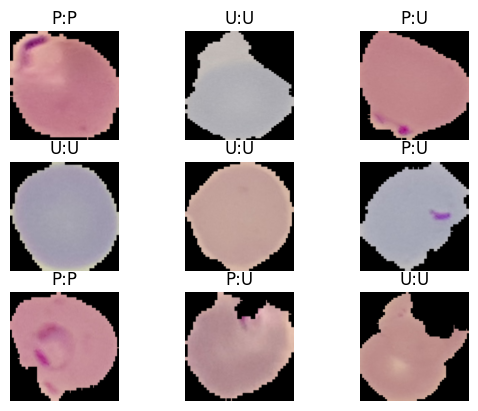

In [89]:
for i, (image, label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[0])
  plt.title(str(paraside_or_not(label.numpy()[0])) + ":" +str(paraside_or_not(model.predict(image)[0][0])))
  plt.axis('off')

1/1 [==============================] - 0s 42ms/step


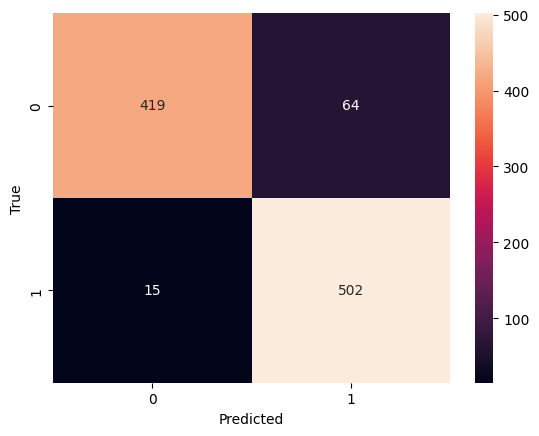

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = []
predicted_labels = []
test = 100
start  = 0
for image, label in test_dataset:
  if start == test:
    break
  start += 1
  true_labels.append(label.numpy()[0])
  predicted_labels.append(round(model.predict(image)[0][0]))

cm = confusion_matrix(true_labels, predicted_labels)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [95]:
model.save("SavedModel")